In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data_breast.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

**Параметр id не нужен, так как не несет нужную информацию для обучения**

In [4]:
data.drop('id', axis=True, inplace=True)

**Статистические показатели, в целом, нормальные, однако в некоторых случаях, при наблюдении за максимальным значением, складывается представление о большом количестве выбросов. Для большего понимания следует построить гистограммы.**

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Классы вполне сбалансированы**

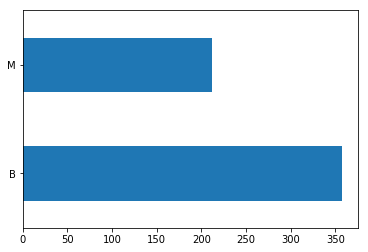

In [6]:
data['diagnosis'].value_counts().plot(kind="barh")

**Для того, чтобы выбрать оптимальные параметры для модели, можно построить гистограммы с разбиением на классы**

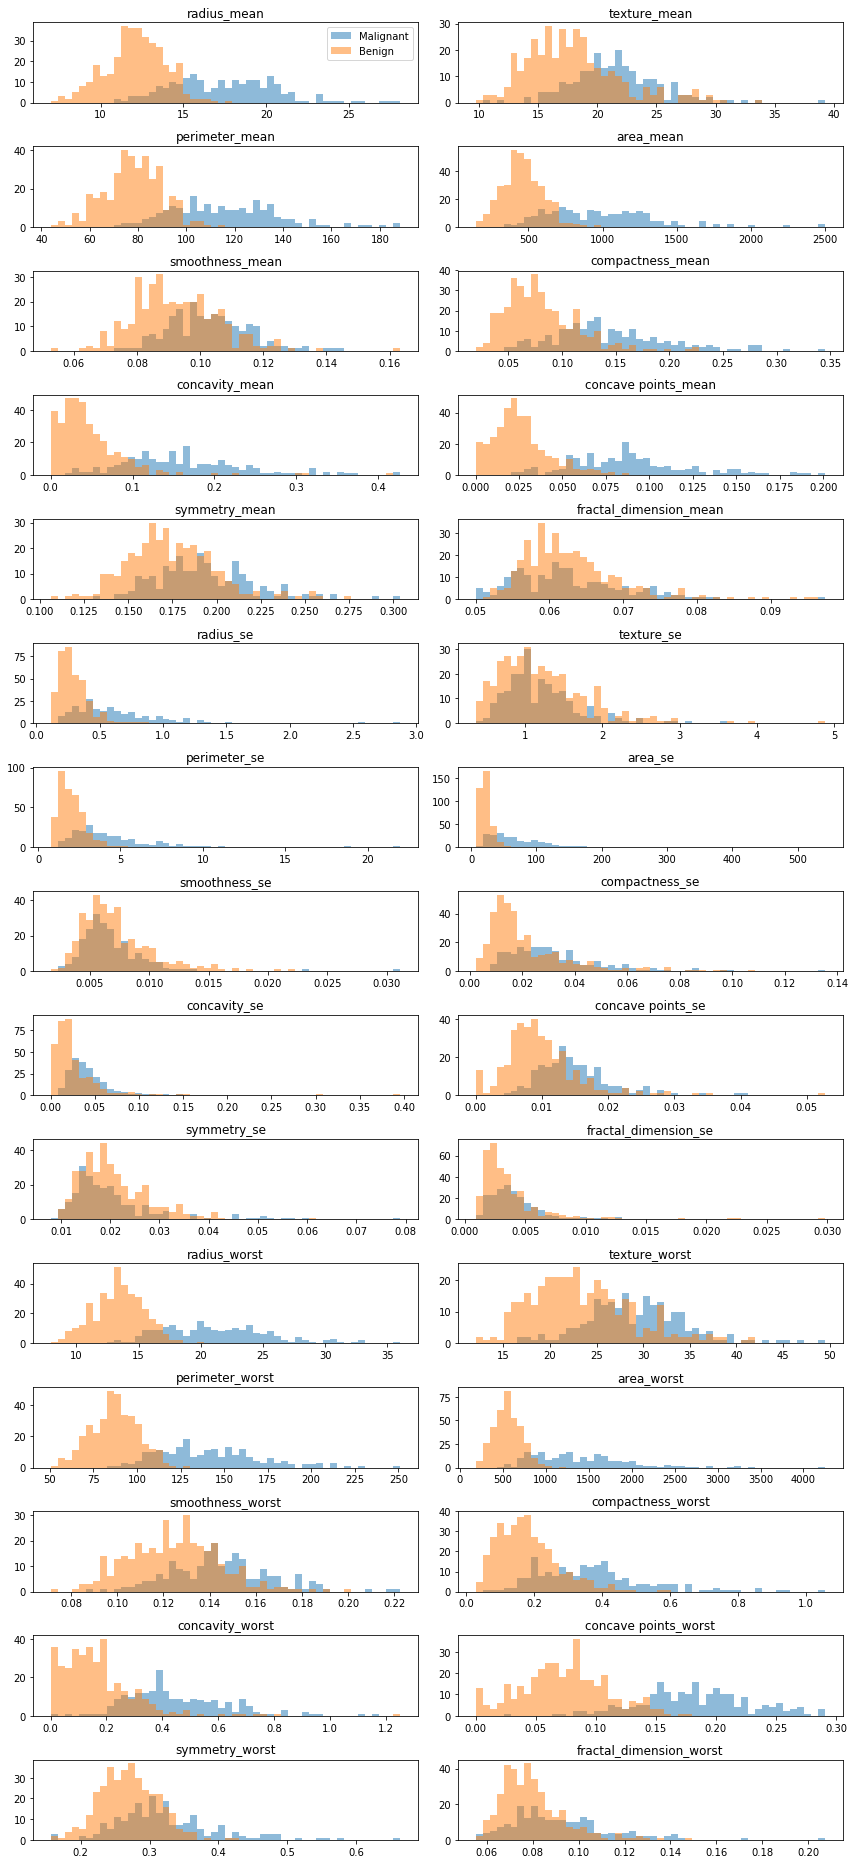

In [8]:
fig, axes = plt.subplots(15,2, figsize=(12,26))
m = data[data.diagnosis=='M']
b = data[data.diagnosis=='B']

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(data.drop('diagnosis', axis=1).iloc[:,i], bins=50)
    ax[i].hist(m.drop('diagnosis', axis=1).iloc[:,i], bins=bins, alpha=0.5)
    ax[i].hist(b.drop('diagnosis', axis=1).iloc[:,i], bins=bins, alpha=0.5)
    ax[i].set_title(data.drop('diagnosis', axis=1).columns[i])

ax[0].legend(['Malignant', 'Benign'], loc='best')
fig.tight_layout()

**Некоторые параметры, похоже, нет смысла использовать для модели, та как для обоих классов они имеют одинаковые распределения значений.**

**Чтобы дополнительно в этом убедиться визуально, а так же посмотреть на масштаб выбросов, можно построить boxplot для каждого параметра.**

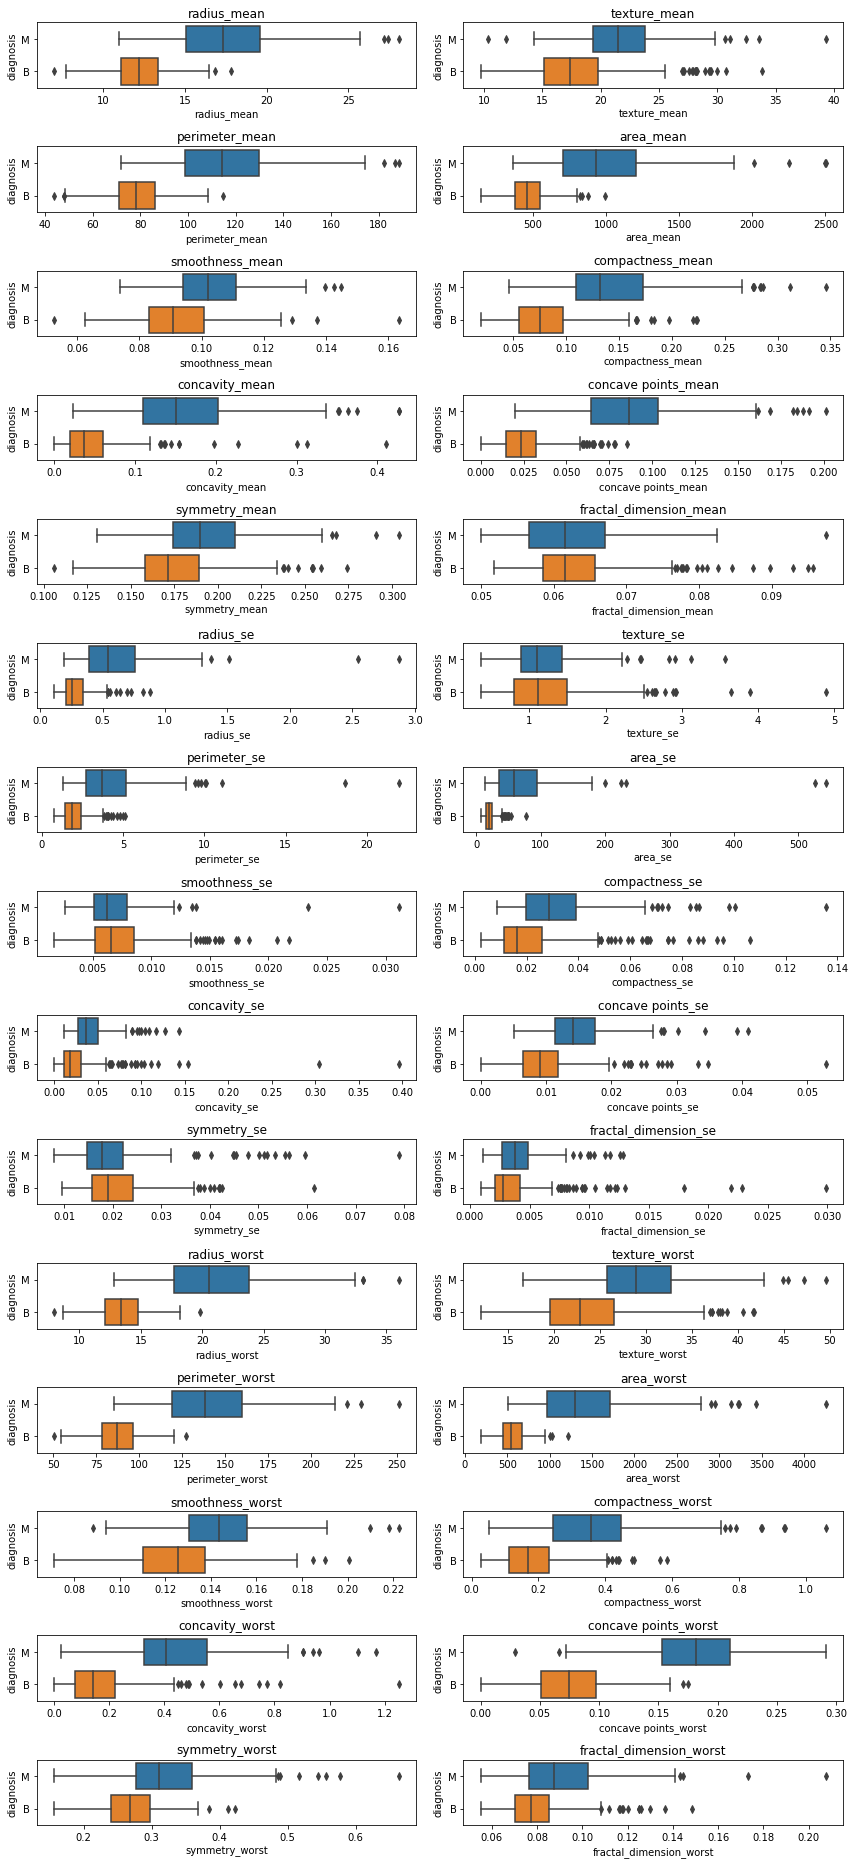

In [9]:
fig, axes = plt.subplots(15,2, figsize=(12,26))
m = data[data.diagnosis=='M']
b = data[data.diagnosis=='B']

ax = axes.ravel()
for i in range(30):
    sns.boxplot(y=data.diagnosis, x=data.drop('diagnosis', axis=1).iloc[:,i], ax=ax[i], orient='h') 
    ax[i].set_title(data.drop('diagnosis', axis=1).columns[i])
fig.tight_layout()

**На графиках boxplot можно наблюдать, что для некоторых параметров в двух разных выборках, соотвтетствующих разным классам, медианы практически совпадают, видно довольно большое количество выбросов, которые можно охарактеризовать так только после того, как будет проведена работа с профильными специалистами. Пока стоит их оставить не тронутыми.**

**Для дальнейшей работы параметр 'diagnosis' лучше будет преобразовать в бинарный формат таким образом, что 'B' (Benign) = 0, 'M' (Malignant) = 1**

In [7]:
#Осторожно! Функцию применить можно только 1 раз после загрузки Data Set
data['diagnosis'] = data.diagnosis.apply(lambda x: 0 if x=='B' else 1)

**Если принять во внимание приведенные выше графики, можно смело исключить несколько параметров, так как обучение на них не внесет весомого вклада, или наоборот, ухудшит обобощение модели**

In [8]:
to_drop = ['symmetry_se','fractal_dimension_se', 'fractal_dimension_mean', 'smoothness_se']

**Для наглядности можно привести диаграмму зависимости классов от одного из исключаемых параметров и для сравнения рядом график для параметра, который считается значимым**

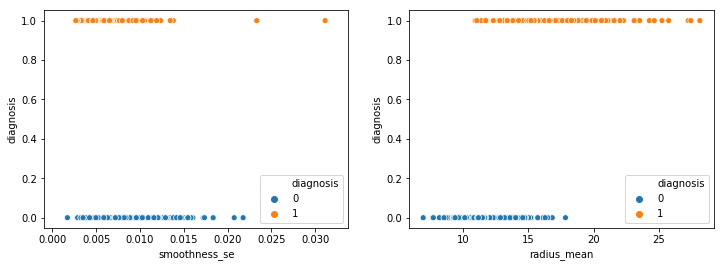

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.scatterplot(data['smoothness_se'], data['diagnosis'], data['diagnosis'], ax=axes[0])
sns.scatterplot(data['radius_mean'], data['diagnosis'], data['diagnosis'], ax=axes[1])


**На графиках ниже можно так же увидеть, что исключаемый параметр не несет информации, которая позволила бы разделить выборку на классы. Для сравнения рядом построен график для значимых переменных.**

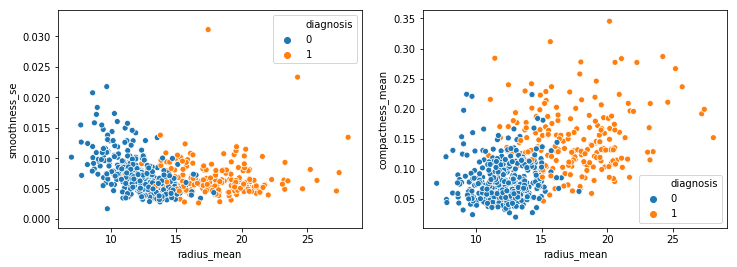

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.scatterplot(data.radius_mean, data['smoothness_se'], data.diagnosis, ax=axes[0])
sns.scatterplot(data.radius_mean, data['compactness_mean'], data.diagnosis, ax=axes[1])


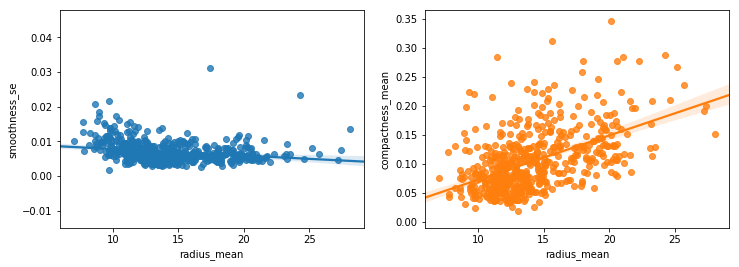

In [172]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.regplot(data.radius_mean, data['smoothness_se'], data.diagnosis, ax=axes[0])
sns.regplot(data.radius_mean, data['compactness_mean'], data.diagnosis, ax=axes[1])


**При помощи AB тестирования можно проверить гипотезу о том, что выбранные для исключения параметры не имеют статстической значимости. Другими словами, что нулевая гипотеза верна и различий между средним выборки и генеральной совокупности нет.**

**Ниже приведены результаты одновыборочных тестов для двух независимых выборок, при сравнении с исключаемыми параметрами**

**Результат во всех случаях выше 5%, а в большинстве, существенно выше, что позволяет принять нулевую гипотезу**

In [11]:
for nm in to_drop:
    print(nm + ':')
    print(stats.ttest_1samp(data[data.diagnosis==0][nm], data[nm].mean()))
    print(stats.ttest_1samp(data[data.diagnosis==1][nm], data[nm].mean()), '\n')

symmetry_se:
Ttest_1sampResult(statistic=0.11206191872630128, pvalue=0.9108374693968717)
Ttest_1sampResult(statistic=-0.10111664125640867, pvalue=0.9195538869617266) 

fractal_dimension_se:
Ttest_1sampResult(statistic=-1.021513940556994, pvalue=0.30770466744773733)
Ttest_1sampResult(statistic=1.9078564056236185, pvalue=0.05776750104978769) 

fractal_dimension_mean:
Ttest_1sampResult(statistic=0.19541780810803736, pvalue=0.8451773625575594)
Ttest_1sampResult(statistic=-0.22593164735515744, pvalue=0.8214732802621578) 

smoothness_se:
Ttest_1sampResult(statistic=0.9564058073570666, pvalue=0.3395162638120335)
Ttest_1sampResult(statistic=-1.3141770524556873, pvalue=0.19021349263049736) 



**Чтобы убедиться в том, что не были пропущены все статистически незначимые параметры, которые можно исключить, ниже проведен двувыборочный тест для всех параметров**

In [12]:
for nm in data.drop('diagnosis', axis=1).columns:
    test = (stats.ttest_ind(data[data.diagnosis==0][nm],
                 data[data.diagnosis==1][nm]))
    print(nm + ':\n {}'.format(test), '\n')

radius_mean:
 Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262181e-96) 

texture_mean:
 Ttest_indResult(statistic=-10.86720108146434, pvalue=4.0586360478980736e-25) 

perimeter_mean:
 Ttest_indResult(statistic=-26.405212979192665, pvalue=8.436251036174487e-101) 

area_mean:
 Ttest_indResult(statistic=-23.938687235690992, pvalue=4.734564310307209e-88) 

smoothness_mean:
 Ttest_indResult(statistic=-9.146098808149038, pvalue=1.0518503592032013e-18) 

compactness_mean:
 Ttest_indResult(statistic=-17.69839197688993, pvalue=3.9382631058873895e-56) 

concavity_mean:
 Ttest_indResult(statistic=-23.10396343062264, pvalue=9.96655575507353e-84) 

concave points_mean:
 Ttest_indResult(statistic=-29.354318592113618, pvalue=7.101150161057422e-116) 

symmetry_mean:
 Ttest_indResult(statistic=-8.338311789592808, pvalue=5.733384028466827e-16) 

fractal_dimension_mean:
 Ttest_indResult(statistic=0.30571112978583087, pvalue=0.7599368037256238) 

radius_se:
 Ttest_indResult(statistic=-

**Чтобы найти коррелирующие друг с другом параметры, которые можно исключить из набора, ниже построена, на основании матрицы корреляций, "тепловая" карта, после того, как выбранные статистически незначительные параметры были исключены.**

In [13]:
data_mod = data.copy()

In [14]:
data_mod.drop(to_drop, axis=1, inplace=True)

In [15]:
data_mod.drop('diagnosis', axis=1).corr()['radius_mean'].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
texture_se                -0.097317
Name: radius_mean, dtype: float64

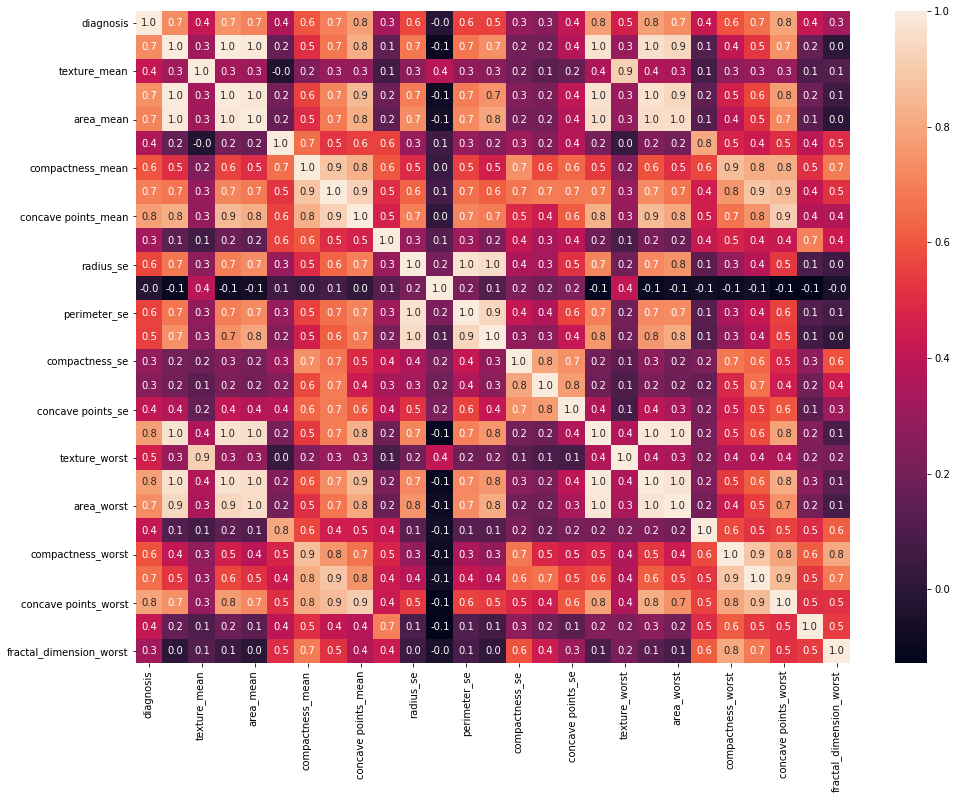

In [144]:
sns.heatmap(data_mod.corr(), annot=True, fmt=".1f")
plt.gcf().set_size_inches(16, 12)

**Для лучшей работы модели все значения следует привести к одинаковому масштабу. Выше было показано при помощи "ящичковых диаграмм", что присутствуют "выбросы", которые решено было оставить. Для того, чтобы уменьшить их влияние, следует использовать нормализацию, либо StandardScaler.**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_mod.drop('diagnosis', axis=1))


**При помощи train_test_split необходимо разделить набор данных на тренировочный и тестовый.**

In [74]:
from sklearn.model_selection import train_test_split

y = data_mod.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)


**Ниже проведено обучение с обучающим набором на трех моделях, которые поддерживают predict probability: LogisticRegression, KNeighborsClassifier, SVC.**

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10)
model.fit(X_train, y_train)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier(n_neighbors=7)
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [77]:
from sklearn.svm import SVC
s_model = SVC(C=1, gamma='auto', probability=True)
s_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**На первый взгляд, даже без особых настроек, результат оказался неплохим.**

In [79]:
print("LogReg - Train Score: {0:.3f}".format(model.score(X_train, y_train)))
print("LogReg - Test Score: {0:.3f}".format(model.score(X_test, y_test)))
print()
print("Neighbors - Train Score: {0:.3f}".format(k_model.score(X_train, y_train)))
print("Neighbors - Test Score: {0:.3f}".format(k_model.score(X_test, y_test)))
print()
print("SVC - Train Score: {0:.3f}".format(s_model.score(X_train, y_train)))
print("SVC - Test Score: {0:.3f}".format(s_model.score(X_test, y_test)))


LogReg - Train Score: 0.991
LogReg - Test Score: 0.965

Neighbors - Train Score: 0.974
Neighbors - Test Score: 0.974

SVC - Train Score: 0.987
SVC - Test Score: 0.965


**При помощи cross_val на полном наборе ниже проведена проверка того, насколько хорошо каждая их выбранных моделей обобщена. Если не зафиксировать random_state, то результат будет каждый раз отличаться, однако, в среднем ниже 0.95 не падает.**

In [80]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=10, random_state=2)

print("LogReg model cross_val mean score: {0:.3f}".format(cross_val_score(model, X_scaled, y, cv=shuffle_split).mean()))
print("K neighbors model cross_val mean score: {0:.3f}".format(cross_val_score(k_model, X_scaled, y, cv=shuffle_split).mean()))
print("SVC model cross_val mean score: {0:.3f}".format(cross_val_score(s_model, X_scaled, y, cv=shuffle_split).mean()))


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/dat

LogReg model cross_val mean score: 0.979
K neighbors model cross_val mean score: 0.963
SVC model cross_val mean score: 0.972


**При помощи матрицы несоответствий для тестового набора можно посмотреть какие именно классы хуже всего предсказаны. К сожалению, модель чаще всего ошибается при опеределении доброкачественной опухоли, и в тех случаях, когда известно, что опухоль злокачественная, модель определяет ее доброкачественной. Понятно, что лучше, если будет наоборот.**

**Если в качестве позитивного принять значение 'M', то лучше, если бы модель определяла все злокачественные опухоли, даже ценой того, что к таковым отнесет и доброкачественные. Однако, в таких случаях эта ошибка может быть оправдана.**

In [81]:
from sklearn.metrics import confusion_matrix
print('Logistic regression Confusion Matrix whole set:\n')
print('    B\tM')
print('B',confusion_matrix(y_train, model.predict(X_train))[0,:])
print('M',confusion_matrix(y_train, model.predict(X_train))[1,:])


Logistic regression Confusion Matrix whole set:

    B	M
B [287   1]
M [  3 164]


In [82]:
print('K Neighbors Confusion Matrix whole set:\n')
print('    B\tM')
print('B',confusion_matrix(y_train, k_model.predict(X_train))[0,:])
print('M',confusion_matrix(y_train, k_model.predict(X_train))[1,:])


K Neighbors Confusion Matrix whole set:

    B	M
B [286   2]
M [ 10 157]


In [83]:
from sklearn.metrics import confusion_matrix
print('SVC Confusion Matrix whole set:\n')
print('    B\tM')
print('B',confusion_matrix(y_train, s_model.predict(X_train))[0,:])
print('M',confusion_matrix(y_train, s_model.predict(X_train))[1,:])

SVC Confusion Matrix whole set:

    B	M
B [287   1]
M [  5 162]


**Полученные значения показателей precision и recall, например, для модели SVC, отражают результаты, которые можно наблюдать в матрицах, а именно, количество правильно предсказанных позитивных значений ниже, чем точность предсказаний.**

In [140]:
from sklearn.metrics import precision_score, recall_score

print('Recall: {0:.2f}'.format(recall_score(y_train, s_model.predict(X_train))))
print('Precision: {0:.2f}'.format(precision_score(y_train, s_model.predict(X_train))))

Recall: 0.97
Precision: 0.99


**Можно посмотреть, какое значение threshold надо выбрать, чтобы повысить показатель recall.**

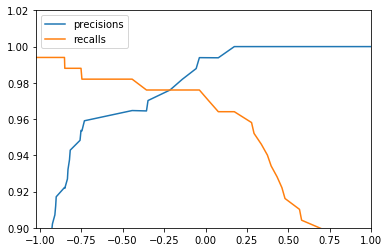

In [142]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, s_model.decision_function(X_train))
sns.lineplot(thresholds, precisions[:-1], label='precisions')
sns.lineplot(thresholds, recalls[:-1],label='recalls')
plt.legend(loc='best')
plt.xlim([-1.02,1])
plt.ylim([0.9,1.02])
plt.show()

**При значении threshold от -1 получается достичь показателя recall в 99%, при этом precision падает.** 

In [163]:
scores = s_model.decision_function(X_train)
v = -0.86
print('Recall: {0:.2f}'.format(recall_score(y_train, scores>v)))
print('Precision: {0:.2f}'.format(precision_score(y_train, scores>v)))

Recall: 0.99
Precision: 0.92


**И теперь confusion matrix выглядит несколько иначе, именно так, как ожидалось.**

In [165]:
print('SVC Confusion Matrix whole set:\n')
print('    B\tM')
print('B',confusion_matrix(y_train, scores>v)[0,:])
print('M',confusion_matrix(y_train, scores>v)[1,:])

SVC Confusion Matrix whole set:

    B	M
B [274  14]
M [  1 166]


**Ниже приведена ROC кривая, а так же, соответствующая оценка. Судя по ее значению, особых улучшений модели не требуется.**

In [183]:
lr_train_predict = model.predict_proba(X_train)[:,1]
lr_test_predict = model.predict_proba(X_test)[:,1]

k_train_predict = k_model.predict_proba(X_train)[:,1]
k_test_predict = k_model.predict_proba(X_test)[:,1]

s_train_predict = s_model.predict_proba(X_train)[:,1]
s_test_predict = s_model.predict_proba(X_test)[:,1]


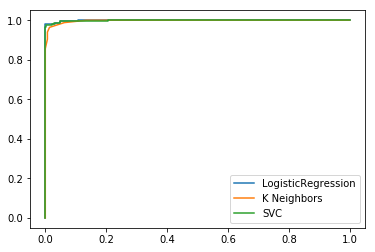

In [186]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, lr_train_predict)
fpr_k, tpr_k, thresholds_k = roc_curve(y_train, k_train_predict)
fpr_s, tpr_s, thresholds_s = roc_curve(y_train, s_train_predict)
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression')
plt.plot(fpr_k, tpr_k, label='K Neighbors')
plt.plot(fpr_s, tpr_s, label='SVC')
plt.legend(loc='lower right')
plt.show()

In [185]:
print('LogisticRegression ROC Score: {0:.3f}'.format(roc_auc_score(y_train, lr_train_predict)))
print('K Neighbors ROC Score: {0:.3f}'.format(roc_auc_score(y_train, k_train_predict)))
print('SVC ROC Score: {0:.3f}'.format(roc_auc_score(y_train, s_train_predict)))


LogisticRegression ROC Score: 0.999
K Neighbors ROC Score: 0.997
SVC ROC Score: 0.998
